In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf
sns.set_theme(style="white")
import matplotlib as mpl


mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Set the default visibility of the spines
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

91.79064039408867 %
0.3399886534348442 %
203


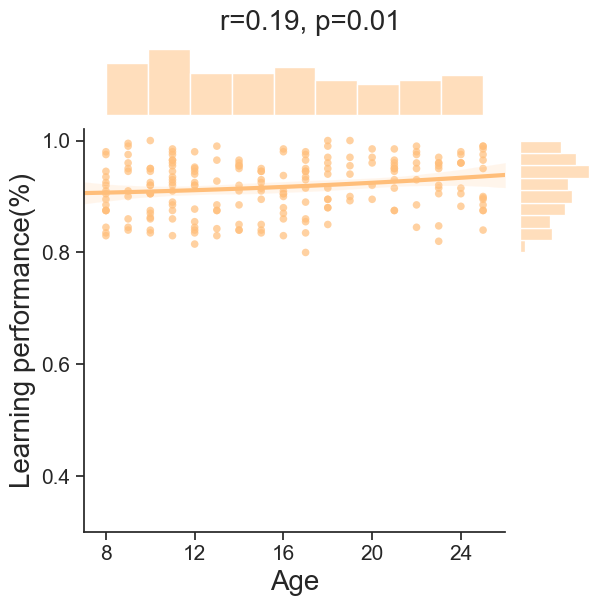

In [44]:
from scipy.stats import sem
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

print(data['training_acc'].mean()*100,'%')
print(sem(data['training_acc'])*100, '%')
#data = data.query('(training_acc>0.84)|(Age>12)')
print(len(data))

# correlation
res = pearsonr(data['Age'],data['training_acc'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age", y="training_acc", data=data,
                  kind="reg",truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#ffbe7a', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.7,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Learning performance(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,2)))
else:
    g.fig.suptitle('r={}, p={}'.format(round(r,2),round(p,2)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')

#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-training.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

[Text(0, 0, '21'),
 Text(0, 0, '13'),
 Text(0, 0, '16'),
 Text(0, 0, '22'),
 Text(0, 0, '16'),
 Text(0, 0, '9'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '12'),
 Text(0, 0, '14'),
 Text(0, 0, '13'),
 Text(0, 0, '6'),
 Text(0, 0, '5'),
 Text(0, 0, '15'),
 Text(0, 0, '8'),
 Text(0, 0, '18'),
 Text(0, 0, '11'),
 Text(0, 0, '14'),
 Text(0, 0, '5'),
 Text(0, 0, '1'),
 Text(0, 0, '3')]

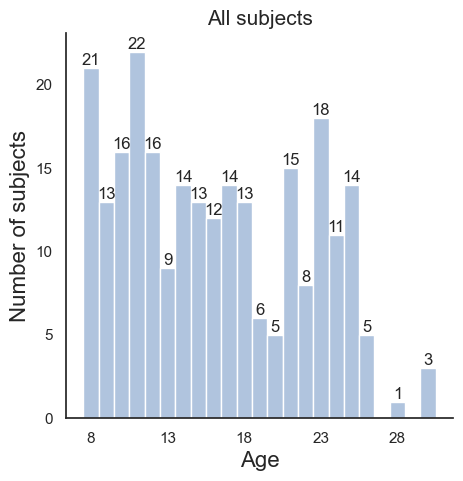

In [17]:
import numpy as np

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
#data = data[data['game1_fmri']]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

fig, ax = plt.subplots(figsize=(5,5))
bar_width = 1
ages_all = [group[0] for group in data.groupby('Age')]
nums_all = [len(group[1]) for group in data.groupby('Age')]

rects = ax.bar(ages_all, nums_all,width=bar_width,color='lightsteelblue')
ax.set_xlabel("Age", size=16)
ax.set_ylabel("Number of subjects", size=16)
ax.set_xticks(np.arange(min(ages_all), max(ages_all)+1, 5))  # Set x-ticks to appear every 5 years
ax.set_yticks(np.arange(0, max(nums_all)+1, 5))  # # Set y-ticks to be same as game 1
ax.set_title("All subjects", size=15)

ax.bar_label(rects, fmt='{:,.0f}',size=12)

In [18]:
children = data.query("Age<=18")
adult = data.query("Age>18")
adult
data = data[data['game1_fmri']>=0.5]

,Participant_ID,Exp_ID,Name,线上训练开始日期,Date(预约日期),Location,Age,Sex,Group,训练主试,...,game2_train_ap,game2_train_dp,game2_test_acc,meg_behavior,meg_neuro,game1_behavior,game1_fmri,game2_behavior,game2_fmri,training_acc
0,sub-001,1,ZhouJianYang,NaN,2021.10.1,北大,23,male,adult,瞿宇堃,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,sub-002,2,XuYue,NaN,2021.10.8,北大,23,female,adult,瞿宇堃,...,NaN,NaN,NaN,0.0,0.2,0.0,0.0,0.0,0.0,NaN
2,sub-003,3,WangHaiTeng,NaN,2021.10.11,生物物理所,21,male,adult,瞿宇堃,...,NaN,NaN,0.617,0.0,1.0,0.7,0.0,0.0,0.0,0.835
4,sub-005,5,OuJianXin,NaN,2021.10.19,北大,26,male,adult,瞿宇堃,...,0.594,0.688,0.900,0.0,0.5,0.0,0.0,0.0,0.0,0.990
9,sub-010,Z1,郑晖,NaN,2021.11.27,生物物理所,22,male,adult,瞿宇堃,...,0.812,0.469,0.786,1.0,1.0,1.0,0.5,1.0,0.0,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,sub-243,Z89,吴欣宇,2023.02.06,2023.02.13,北大,21,female,adult,吴舒棋,...,0.969,0.969,0.964,1.0,0.5,1.0,1.0,1.0,1.0,0.875
243,sub-245,Z46,杜舟,2023.01.27,2023.02.14,北大,21,female,adult,吴舒棋,...,0.969,0.938,0.940,1.0,0.5,1.0,1.0,1.0,1.0,0.950
244,sub-246,Z20,刘耘华,2023.01.12,2023.02.14,北大,21,male,adult,吴舒棋,...,0.938,0.875,0.893,1.0,0.5,1.0,1.0,1.0,1.0,0.955
245,sub-247,Z75,张杨钰,2023.02.06,2023.02.19,北大,19,male,adult,吴舒棋,...,0.906,0.844,0.810,1.0,0.5,1.0,1.0,1.0,1.0,0.900


In [35]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data = pd.read_csv(beha_total_score,sep='\t')
data = data.query('game1_fmri>=0.5')

children = data.query('Age>18')
children

,Participant_ID,Exp_ID,Name,线上训练开始日期,Date(预约日期),Location,Age,Sex,Group,训练主试,...,game1_acc,game2_train_ap,game2_train_dp,game2_test_acc,meg_behavior,meg_neuro,game1_behavior,game1_fmri,game2_behavior,game2_fmri
9,sub-010,Z1,郑晖,NaN,2021.11.27,生物物理所,22,male,adult,瞿宇堃,...,0.794,0.812,0.469,0.786,1.0,1.0,1.0,0.5,1.0,0.0
17,sub-018,Z22,李哲,NaN,2021.12.11,生物物理所,25,female,child,自训,...,0.730,0.875,0.906,0.810,1.0,1.0,1.0,1.0,1.0,1.0
22,sub-023,Z21,王之品,NaN,2021.12.14-15,北大,23,female,adult,樊懿,...,0.694,0.844,0.812,0.714,1.0,0.5,1.0,1.0,1.0,1.0
23,sub-024,Z7,孙涛,NaN,2021.12.18,生物物理所,25,male,adult,樊懿,...,0.754,1.000,0.906,0.821,1.0,1.0,1.0,1.0,1.0,1.0
28,sub-029,Z31,于倩倩,NaN,2021.12.21-22,北大,25,female,adult,王馨,...,0.730,0.906,0.812,0.905,1.0,0.5,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,sub-243,Z89,吴欣宇,2023.02.06,2023.02.13,北大,21,female,adult,吴舒棋,...,0.881,0.969,0.969,0.964,1.0,0.5,1.0,1.0,1.0,1.0
243,sub-245,Z46,杜舟,2023.01.27,2023.02.14,北大,21,female,adult,吴舒棋,...,0.881,0.969,0.938,0.940,1.0,0.5,1.0,1.0,1.0,1.0
244,sub-246,Z20,刘耘华,2023.01.12,2023.02.14,北大,21,male,adult,吴舒棋,...,0.853,0.938,0.875,0.893,1.0,0.5,1.0,1.0,1.0,1.0
245,sub-247,Z75,张杨钰,2023.02.06,2023.02.19,北大,19,male,adult,吴舒棋,...,0.746,0.906,0.844,0.810,1.0,0.5,1.0,1.0,1.0,1.0


## Age - Game1-2D Inference

203


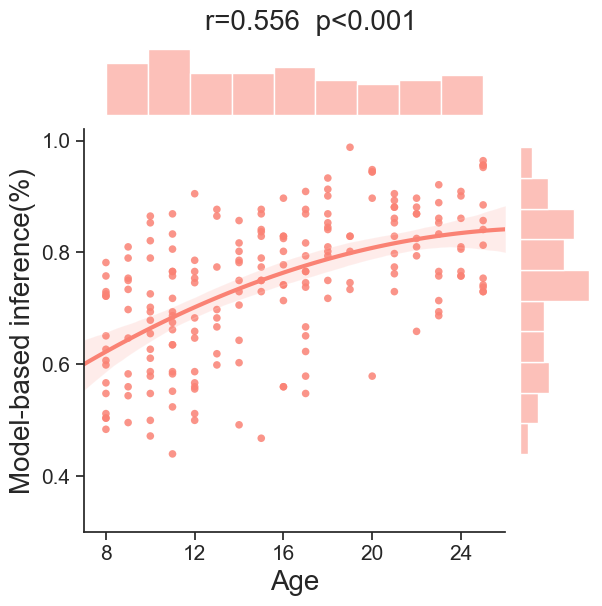

In [68]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

print(len(data))
res = pearsonr(data['Age'],data['game1_acc'])
r = res[0]
p = res[1]
age_color = '#e36570'
# plot#FFCDB2
g = sns.jointplot(x="Age", y="game1_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#FA8274', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Model-based inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r={}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame1.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

203


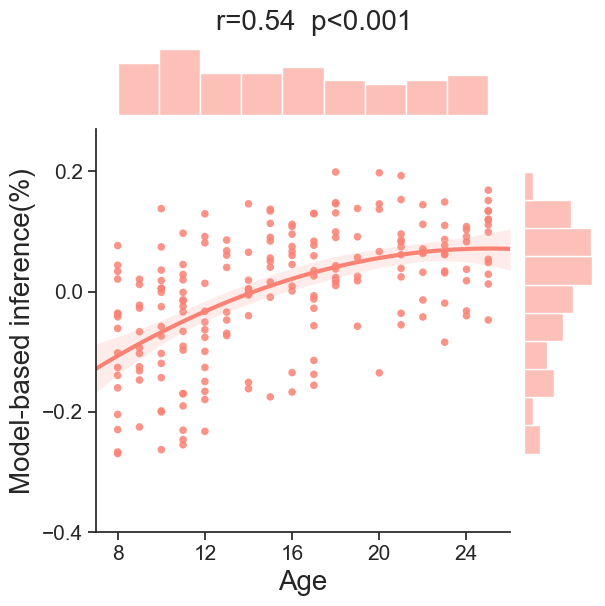

In [99]:

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

results = smf.ols('game1_acc ~ training_acc', data=data).fit()
data['game1_acc_resid'] = results.resid
print(len(data))

res = pearsonr(data['Age'],data['game1_acc_resid'])
r = res[0]
p = res[1]
age_color = '#e36570'
# plot#FFCDB2
g = sns.jointplot(x="Age", y="game1_acc_resid", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26),ylim = (-0.4, 0.27),
                  color='#FA8274', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))

#move overall title up
g.set_axis_labels('Age', 'Model-based inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r={}  p<0.001'.format(round(r,2)),size=20)
else:
    g.fig.suptitle('r={}, p:{}'.format(round(r,2),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([-0.4, -0.2, 0, 0.2],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame1_control-trainning.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

## Age - Game2-2D Inference

193


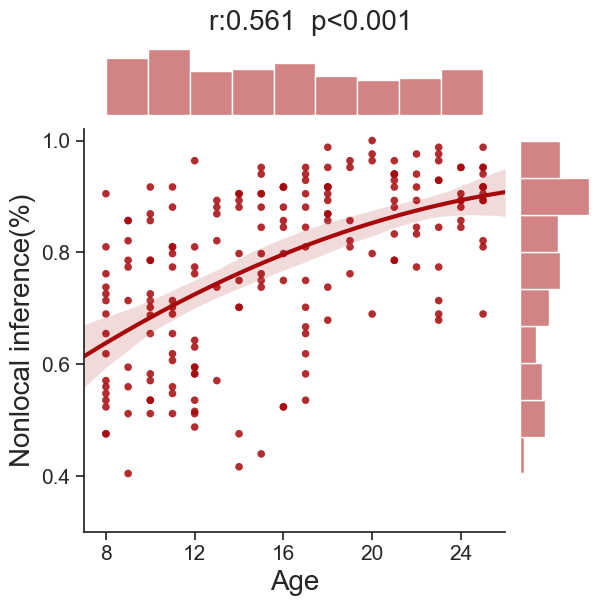

In [47]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')

print(len(data))
# cal correlation
res = pearsonr(data['Age'],data['game2_test_acc'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#A6080B', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))
#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)
# Setting xticks
plt.yticks([0.4, 0.6, 0.8, 1.0],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)
# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame2.pdf'
#g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

193


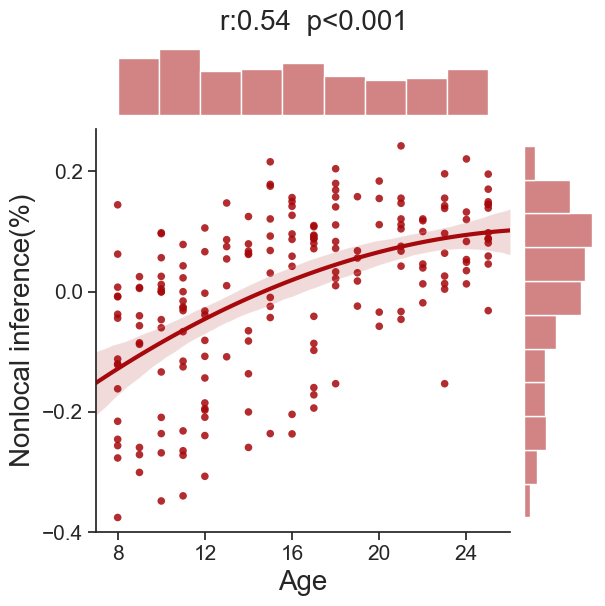

In [100]:
#age-game2
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

results = smf.ols('game2_test_acc ~ training_acc', data=data).fit()
data['game2_test_acc_resid'] = results.resid
print(len(data))

res = pearsonr(data['Age'],data['game2_test_acc_resid'])
r = res[0]
p = res[1]
# plot
g = sns.jointplot(x="Age", y="game2_test_acc_resid", data=data,
                  kind="reg", truncate=False,
                  xlim=(7, 26),ylim = (-0.4, 0.27),
                  color='#A6080B', height=6,order=2,
                  scatter_kws={'s':30,'alpha':0.85,'edgecolor':'None'},
                  line_kws={'linewidth':3},
                  marginal_kws=dict(kde=False,alpha=0.5))
#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,2)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,2),round(p,2)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)
g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([-0.4, -0.2, 0, 0.2],size=15)
plt.xticks([8, 12, 16, 20, 24],size=15)
# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')
savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-2Dgame2_control-trainning.pdf'
g.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300,transparent=True)

##  Age effect in Game2 beyond Game1

83.32642487046633 %
1.012692486249712 %
193


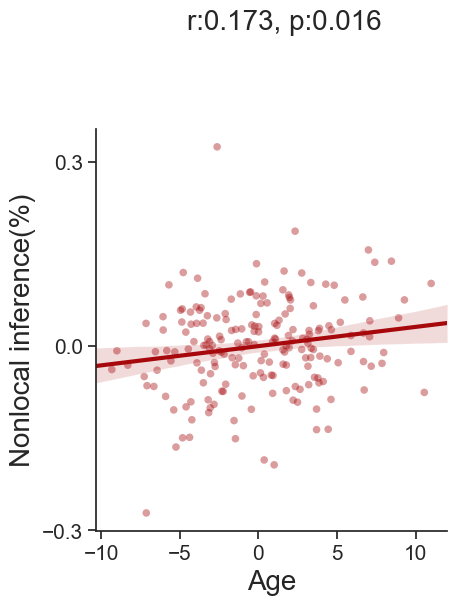

In [43]:
import statsmodels.formula.api as smf
import pingouin as pg
from scipy.stats import sem


beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data.query('game2_fmri>=0.5')
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

print(data['game2_training_acc'].mean()*100,'%')
print(sem(data['game2_training_acc'])*100, '%')
# controlling the effect of game1 and game2 training
glm1 = smf.ols('Age ~ game1_acc + game2_training_acc', data=data).fit()
glm2 = smf.ols('game2_test_acc ~ game1_acc + game2_training_acc', data=data).fit()
# Create a new DataFrame with the residuals
data['Age_resid'] = glm1.resid
data['game2_test_acc_resid'] = glm2.resid

print(len(data))

# cal correlation
res = pearsonr(data['Age_resid'], data['game2_test_acc_resid'])
r = res[0]
p = res[1]

# plot
g = sns.jointplot(x="Age_resid", y="game2_test_acc_resid", data=data,
                  kind="reg", truncate=False,
                  #xlim=(7, 26), ylim=(0.3, 1.02),
                  color='#A6080B', height=6, order=1,
                  scatter_kws={'s':30,'alpha':0.4,'edgecolor':'None'},
                  line_kws={'linewidth':3},marginal_kws=dict(kde=False,alpha=0.5))
g.ax_marg_x.remove()
g.ax_marg_y.remove()
g.fig.set_size_inches(5,6)
#move overall title up
g.set_axis_labels('Age', 'Nonlocal inference(%)',size=20)
g.fig.subplots_adjust(top=0.92)
if p < 0.001:
    g.fig.suptitle('r:{}  p<0.001'.format(round(r,3)),size=20)
else:
    g.fig.suptitle('r:{}, p:{}'.format(round(r,3),round(p,3)),size=20)

# Remove the box lines of the axis
g.ax_joint.spines['top'].set_visible(False)
g.ax_joint.spines['right'].set_visible(False)
g.ax_joint.spines['bottom'].set_visible(True)
g.ax_joint.spines['left'].set_visible(True)

g.ax_marg_x.spines['top'].set_visible(False)

g.ax_marg_x.spines['right'].set_visible(False)
g.ax_marg_x.spines['bottom'].set_visible(False)
g.ax_marg_x.spines['left'].set_visible(False)

g.ax_marg_y.spines['top'].set_visible(False)
g.ax_marg_y.spines['right'].set_visible(False)
g.ax_marg_y.spines['bottom'].set_visible(False)
g.ax_marg_y.spines['left'].set_visible(False)

# Setting xticks
plt.yticks([-0.3, 0, 0.3],size=15)
plt.xticks([-10, -5, 0, 5, 10],size=15)

# Add tick lines to the bottom and left spines
g.ax_joint.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
g.ax_joint.tick_params(axis='y', which='both', left=True, right=False, direction='out')

#savepath = r'/mnt/workdir/DCM/Result/paper/figure1/age-game2_beyond_game1.pdf'
#g.savefig(savepath,bbox_inches='tight', pad_inches=0, dpi=300, transparent=True)  

In [41]:
import pingouin as pg
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

pg.partial_corr(data=data, x='Age', y='training_acc')

,n,r,CI95%,p-val
pearson,203,0.185936,"[0.05, 0.32]",0.007907


In [45]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game2_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

#pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['game1_acc','game2_training_acc','training_acc'])
pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['training_acc','game2_training_acc','game1_acc'])

,n,r,CI95%,p-val
pearson,193,0.132054,"[-0.01, 0.27]",0.068602


In [14]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')

data = data[data['game2_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_ap'])/2

pg.partial_corr(data=data, x='Age', y='game2_test_acc', covar=['game1_acc','game2_training_acc','training_acc'])

,n,r,CI95%,p-val
pearson,193,0.168878,"[0.03, 0.3]",0.019848


In [10]:
beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]
data['training_acc'] = (data['train_ap'] + data['train_dp'])/2

results1 = smf.ols('game1_acc ~ training_acc', data=data).fit()
results2 = smf.ols('Age ~ training_acc', data=data).fit()
data['game1_acc_resid'] = results1.resid
data['age_resid'] = results2.resid
print(len(data))

r, p  = pearsonr(data['age_resid'],data['game1_acc_resid'])
print(round(r,4),round(p,4))

203
0.5449 0.0


In [3]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game1_fmri']>=0.5]

data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
print(len(data))

data['Memory performance'] = data['training_acc']
data['Map-based inference'] = data['game1_acc']

X = data[['Age',"Memory performance"]]
Y = data['Map-based inference']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

203
                             OLS Regression Results                            
Dep. Variable:     Map-based inference   R-squared:                       0.478
Model:                             OLS   Adj. R-squared:                  0.473
Method:                  Least Squares   F-statistic:                     91.49
Date:                 Wed, 18 Oct 2023   Prob (F-statistic):           6.10e-29
Time:                         10:32:43   Log-Likelihood:                 203.18
No. Observations:                  203   AIC:                            -400.4
Df Residuals:                      200   BIC:                            -390.4
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 

In [61]:
import pandas as pd
import statsmodels.api as sm

beha_total_score = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data =  pd.read_csv(beha_total_score,sep='\t')
data = data[data['game2_fmri']>=0.5]
# game2_train_ap =  data['game2_train_ap'].to_list()
# game2_train_ap = [float(p) for p in game2_train_ap]
# data['game2_train_ap'] = game2_train_ap

data['training_acc'] = (data['train_ap'] + data['train_dp'])/2
data['game2_training_acc'] = (data['game2_train_ap'] + data['game2_train_dp'])/2
print(len(data))

data['Map-based inference'] = data['game1_acc']
data['Pairwise memory (training)'] = data['training_acc']
data['Pairwise memory (new knowledge)'] = data['game2_training_acc']
data['Nonlocal inference based on new knowledge'] = data['game2_test_acc']

X = data[['Age','Map-based inference','Pairwise memory (new knowledge)']]
Y = data['Nonlocal inference based on new knowledge']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
print(model_summary)

193
                                        OLS Regression Results                                       
Dep. Variable:     Nonlocal inference based on new knowledge   R-squared:                       0.760
Model:                                                   OLS   Adj. R-squared:                  0.757
Method:                                        Least Squares   F-statistic:                     200.0
Date:                                       Wed, 18 Oct 2023   Prob (F-statistic):           2.17e-58
Time:                                               16:07:53   Log-Likelihood:                 231.71
No. Observations:                                        193   AIC:                            -455.4
Df Residuals:                                            189   BIC:                            -442.4
Df Model:                                                  3                                         
Covariance Type:                                   nonrobust                  

In [9]:
results_as_html = model_summary.tables[1].as_html()
result_table = pd.read_html(results_as_html, header=0, index_col=0)[0]
result_table.to_csv(r'/mnt/workdir/DCM/Result/paper/figure1/age-game2_beyond_game1.csv')